# Apprentissage supervisé

L'objectif de ce TP est d'aborder les notions de base du Machine Learning. Commençons par un problème de regression avec des méthodes linéaires.

# Un problème simple de régression linéaire

Nous allons commencer par un problème simple de regression linéaire. Pour faciliter la compréhension, nous allons prendre des variables monodimensionnelles {(x<sub>1</sub>,y<sub>1</sub>),(x<sub>2</sub>,y<sub>2</sub>),…,(x<sub>n</sub>,y<sub>n</sub>)}. L'objectif est de trouver la fonction f telle que f(x<sub>i</sub>)=y<sub>i</sub>




## Génération des données

On va génerer des variables aleatoire dans l'intervalle [0, 2]. Afin que les résulats soient reproductibles, on fixe une graine à zero puis on génère les données grace à la méthode `random` de la librairie `numpy`.
Les données sont labellisées, les y correspondent à une sinusoide à laquelle on ajoute un bruit aléatoire.

Importer les bibliothèques pyplot de matplotlib, numpy et sklearn. On pourra renommer pyplot en plt et numpy en np.

In [ ]:
# Import des bibliothèques utiles
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# Afin d'avoir des résultats rteproductibles, on fixe une graine (seed)
# A completer en fixant la graine
np.random.seed(0)
# On tire au hasard 100 points dans l'intervalle [0,2]
X = 2 * np.random.rand(100, 1)
# On calcule la valeur de sin(x) pour chaque point, plus un bruit gaussien aléatoire
y = np.sin(X[:,0]) + 0.15 * np.random.randn(100)


## Visualisons les données

Commencons par visualiser les données.

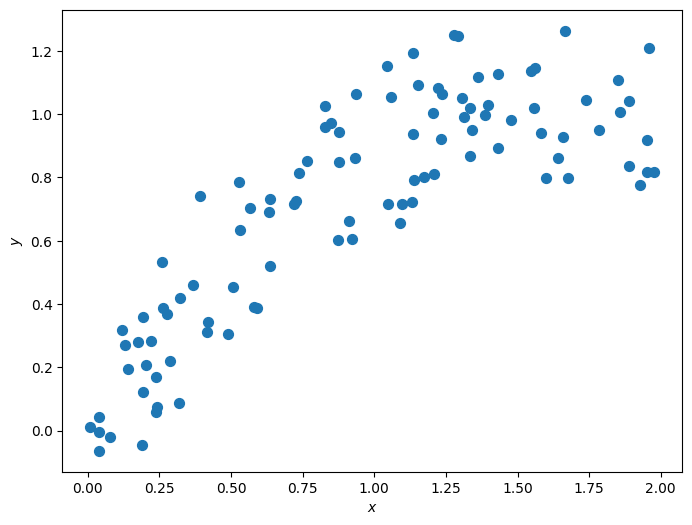

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=50)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Lorsqu'on utilise les méthodes de Machine Learning, on sépare les données pour l'entrainement et une partie pour les tests. Gnénérallement on consacre entre 70 et 80% des données pour l'apprentissage et entre 30 et 20% pour les tests. La methode train_test_split permet ce découpage. La variable `test_size` permet de spécifier le pourcentage du jeu de données qui sera dans le jeu de test. On choisira par exemple `test_size` égal à 0,30. On représentera de couleurs différentes les données de test et les données d'entrainement.

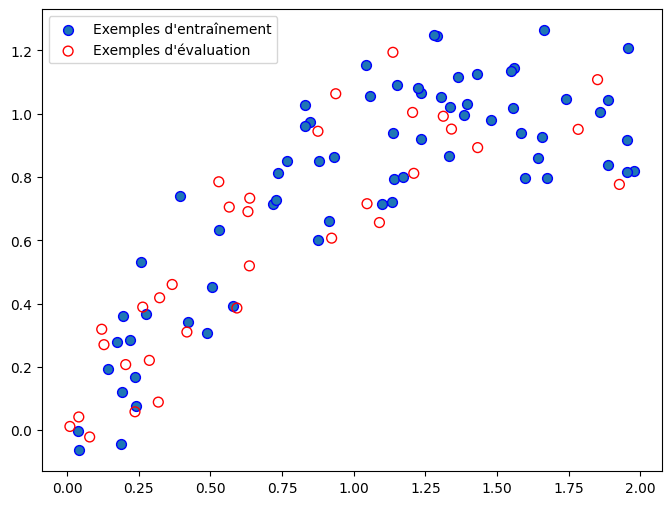

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, s=50, edgecolors='blue', label="Exemples d'entraînement")
plt.scatter(X_test, y_test, c='none', s=50, edgecolors='red', label="Exemples d'évaluation")
plt.legend()
plt.show()

## Méthode de regression linéaire

Quelle que soit la méthode choisie, les étapes seront les mêmes :
*   `fit()` : permet l'entrainement avec la méthode choisie
*   `predict()` ou `transform()` : permet d'appliquer le modèle entrainé à de nouvelles données
* `score()` permet d'évaluer le modèle sur un jeu de tests
Nous allons appliquer une régression linéaire sur nos données d'entrainement



Nous allons utiliser un méthode de regression linéaire. Il est donc necessaire d'importer les modèles linéaire (`linear_model`) de sklearn et d'utiliser la méthode `LinearRegression` de regression linéaire

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# optimisation du modèle: détermination des paramètres de la régression linéaire par la méthode des moindres carrés
reg.fit(X_train, y_train)

LinearRegression()

Evaluons à présent le modèle obtenu à partir de nos données d'entrainement sur le jeu d'apprentissage

In [ ]:
# attention, score() ici ne renvoie pas l'erreur mais la valeur du coefficient de détermination R² !
coeff_train = reg.score(X_train, y_train)
print(f"Coefficient de détermination R² en train : {coeff_train:.2f}")


Coefficient de détermination R² en train : 0.64


Le coefficient de determination (R<sup>2</sup>, soit le carré du coefficient de correlation linéaire r) est un indicateur qui permet de mesurer l'adéquation entre le modèle et les données). Plus R<sup>2</sup> tend vers 1 plus les données sont proches du modèle.

Caluler ce même coefficient sur les données de tests. que constatez-vous ? pourquoi ?

In [ ]:
coeff_test = reg.score(X_test, y_test)
print(f"Coefficient de détermination R² en test : {coeff_test:.2f}")


Coefficient de détermination R² en test : 0.68


Visualisons les données d'entrainement , les données de tests et la droite de regressions linéaire

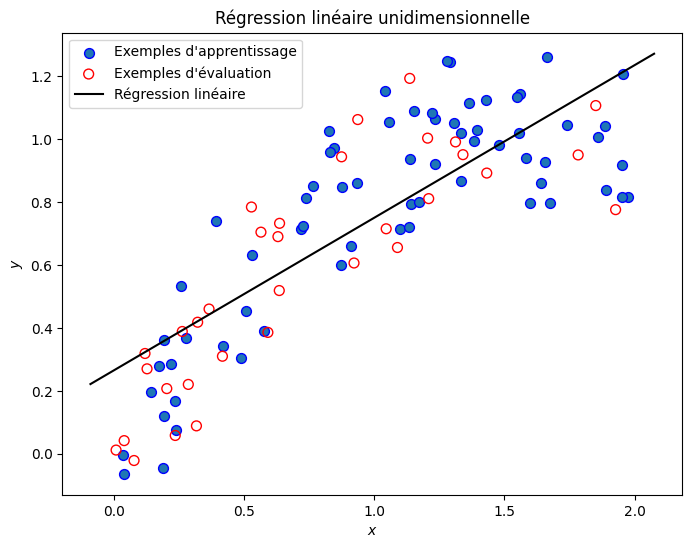

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train,y_train, s=50, edgecolors='blue', label="Exemples d'apprentissage")
plt.scatter(X_test,y_test, c='none', s=50, edgecolors='red', label="Exemples d'évaluation")
plt.xlabel("$x$")
plt.ylabel("$y$")

x_min, x_max = plt.xlim()
nx = 100
xx = np.linspace(x_min, x_max, nx).reshape(-1,1)
plt.plot(xx,reg.predict(xx), color='k', label="Régression linéaire")
plt.title("Régression linéaire unidimensionnelle")
plt.legend()
plt.show()

Calculons l'erreur quadratique moyenne (`mean_square_error` sur les données d'apprentissage puis dur les données de tests

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE = {mse_train:.3f} (train)")
print(f"MSE = {mse_test:.3f} (test)")

MSE = 0.043 (train)
MSE = 0.040 (test)


Interprétez les résultats

## Regression polynomiale

Cette fois nous allons utiliser non pas la regression linéaire mais la regression polynomiale

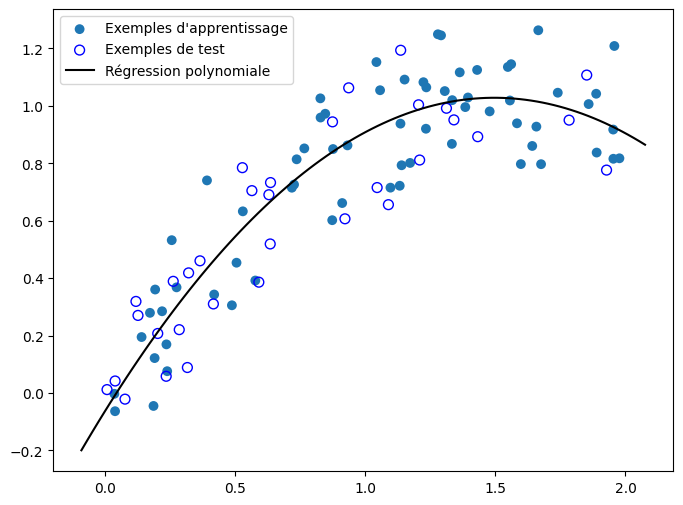

Coefficient R² (train): 0.820
Coefficient R² (test): 0.809


(0.8201551701247571, 0.8089134187426826)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def polynomial_fit(degree, show=False):
      pipe = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('reg', linear_model.LinearRegression())])

      pipe.fit(X_train, y_train)
      train_score = pipe.score(X_train, y_train)
      test_score = pipe.score(X_test, y_test)

      if show:
          plt.figure(figsize=(8, 6))
          plt.scatter(X_train, y_train, s=50, edgecolors='none', label="Exemples d'apprentissage")
          plt.scatter(X_test, y_test, c='none', s=50, edgecolors='blue', label="Exemples de test")
          x_min, x_max = plt.xlim()
          xx = np.linspace(x_min, x_max, nx).reshape(-1,1)
          plt.plot(xx,pipe.predict(xx),color='black', label="Régression polynomiale")
          plt.legend()
          plt.show()

          print(f"Coefficient R² (train): {train_score:.3f}")
          print(f"Coefficient R² (test): {test_score:.3f}")
      return train_score, test_score

polynomial_fit(2, show=True)

Que constatez-vous ? Interprétez les résultats.

Faites varier le degré du polynome. Que constatez vous sur les données d'entrainement et sur les données de test ? Interprétez les résultats obtenus.

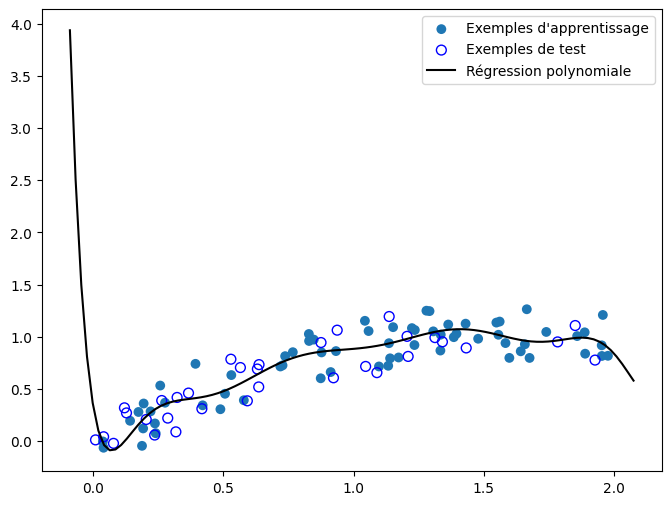

Coefficient R² (train): 0.831
Coefficient R² (test): 0.759


(0.83052787004763, 0.7593258088571775)

In [ ]:
polynomial_fit(10, show=True)

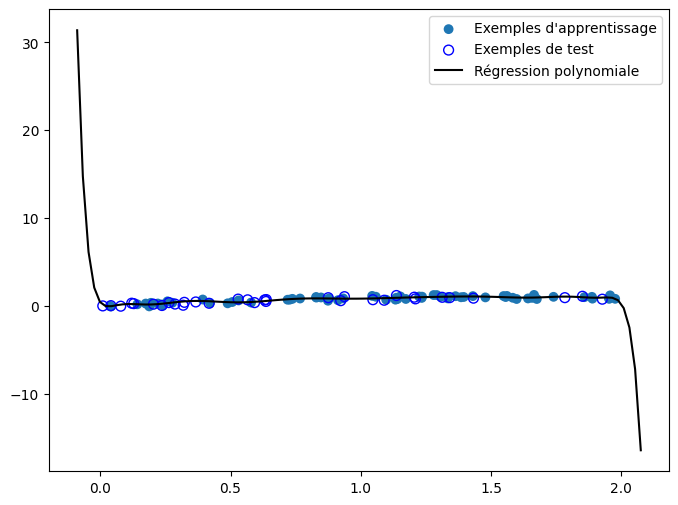

Coefficient R² (train): 0.847
Coefficient R² (test): 0.736


(0.8466144685183578, 0.7362559063105736)

In [ ]:
polynomial_fit(15, show=True)

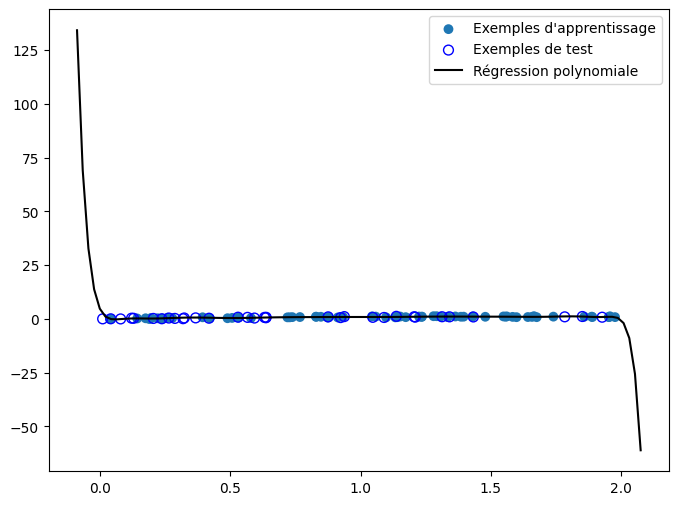

Coefficient R² (train): 0.850
Coefficient R² (test): -0.719


(0.850429723544715, -0.7187796177767118)

In [ ]:
polynomial_fit(20, show=True)

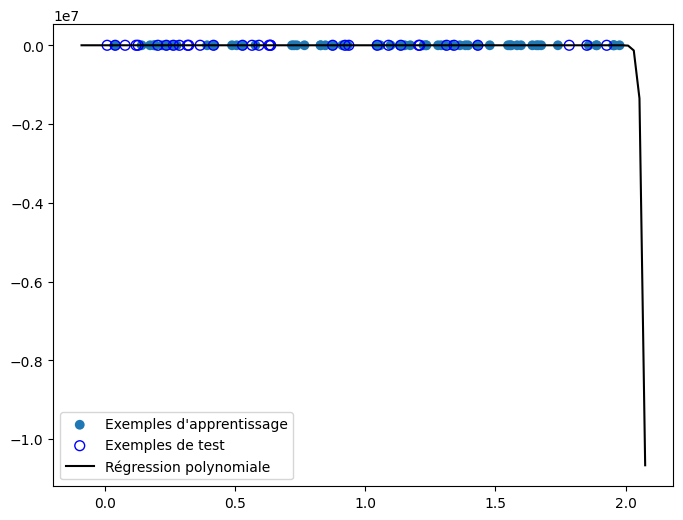

Coefficient R² (train): 0.085
Coefficient R² (test): -0.509


(0.08537545709466399, -0.508542249667413)

In [ ]:
polynomial_fit(100, show=True)

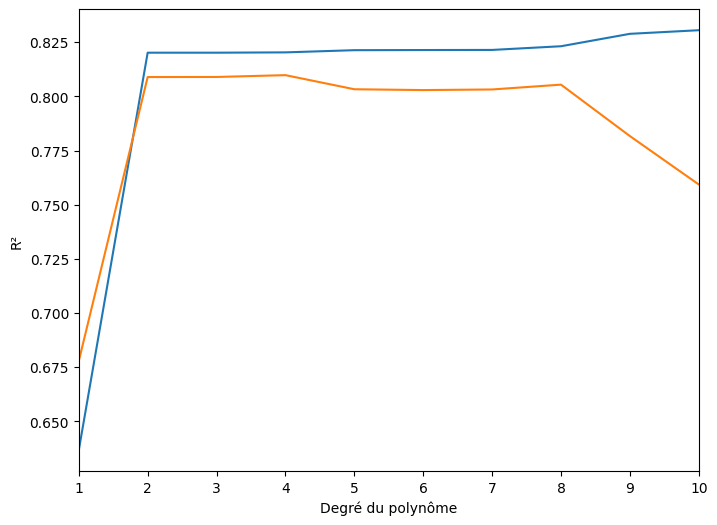

In [ ]:
degrees = np.arange(1, 11, 1)
train_scores, test_scores = zip(*[polynomial_fit(d, show=False) for d in degrees])

fig = plt.figure(figsize=(8, 6))
plt.plot(degrees, train_scores, label="Train")
plt.plot(degrees, test_scores, label="Test")
plt.xlabel("Degré du polynôme")
plt.ylabel("R²")
plt.xlim(1, 10)
plt.show()

Tester mais normalement on devrait constater que plus le degré du polynome augmente, plus le coeffeicient R augment sur les données d'entrainement mais à un moment donné les performances sur les données de test devraient diminuer

#Un problème de classification
Dans un premier temps, nous allons générer les données de deux classes. Nous générons des données à partir de lois normales bidimensionnelles. Pour la première classe nous employons une seule loi avec des variances
différentes et une rotation qui introduit des covariances. La seconde classe est un mélange de 4 lois normales avec des centres différents.


Attention, j'ai traité en une seule fois les 3 exercices. Je traite les *données aléatoire, les données iris et les données concernant le vin* en une seule fois en précisant dans la variable `dataset` l'option choisie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# fixer la graine aléatoire de numpy permet d'obtenir systématiquement les mêmes résultats
np.random.seed(150)

from sklearn import datasets

dataset = "gaussian"

if dataset == "gaussian":
    # définir matrices de rotation et de dilatation
    rot = np.array([[0.94, -0.34], [0.34, 0.94]])
    sca = np.array([[3.4, 0], [0, 2]])
    # générer données classe 1
    c1d = (np.random.randn(100,2)).dot(sca).dot(rot)

    # générer données classe 2
    c2d1 = np.random.randn(25,2)+[-10, 2]
    c2d2 = np.random.randn(25,2)+[-7, -2]
    c2d3 = np.random.randn(25,2)+[-2, -6]
    c2d4 = np.random.randn(25,2)+[5, -7]

    data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

    # générer étiquettes de classe
    l1c = np.ones(100, dtype=int)
    l2c = np.zeros(100, dtype=int)
    labels = np.concatenate((l1c, l2c))
elif dataset == "iris":
    iris_X, iris_y = datasets.load_iris(return_X_y=True)
    data = iris_X[:, :2]
    labels = iris_y
elif dataset == "wine":
    wine_X, wine_y = datasets.load_wine(return_X_y=True)
    data = wine_X[:, (0,10)]
    labels = wine_y

Visualisation des données :

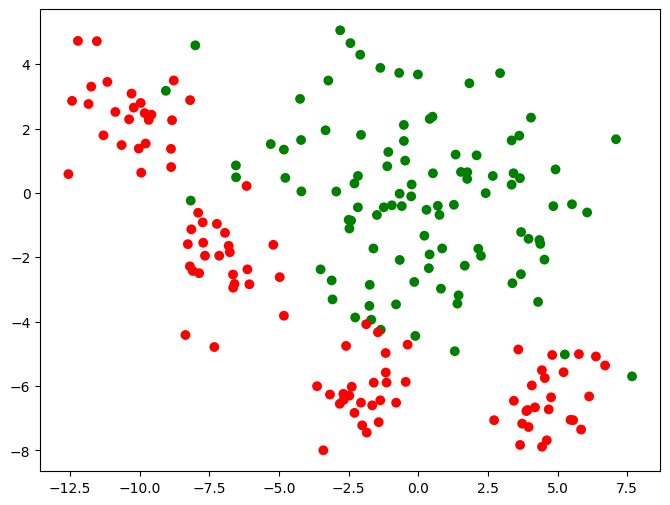

In [ ]:
# les échantillons du premier groupe sont en rouge 'r', ceux du deuxième groupe en vert ("green") 'g'
cmp = np.array(['r','g', 'b'])
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0],data[:,1], c=cmp[labels], s=50, edgecolors='none')
plt.show()

Séparons les données d’apprentissage et les données de test. Les données de test sont affichées
avec cercles vides (`c='none'`), les données d’apprentissage avec des cercles remplis.

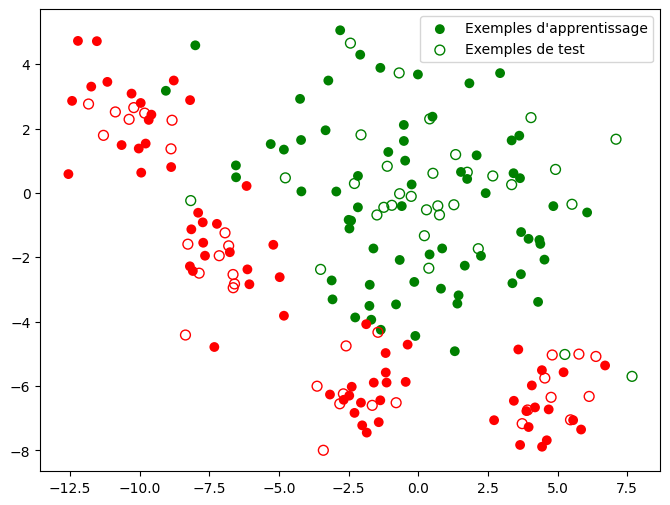

In [ ]:
from sklearn.model_selection import train_test_split

# découpage des données en train et test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train], s=50, edgecolors='none', label="Exemples d'apprentissage")
plt.scatter(X_test[:,0], X_test[:,1], c='none' ,s=50, edgecolors=cmp[y_test], label="Exemples de test")
plt.legend()
plt.show()


### <font color='violet'>Question</font>

Combien d’échantillons le jeu de données d’apprentissage contient-il ? La [documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
peut vous aider.

### <font color='violet'>Correction</font>
Le paramètre test_size=0.33 signifie que l’on conserve 33% des données pour le jeu de test. Le jeu d’apprentissage contient donc 67% des observations, soit 134 échantillons (le jeu de données gaussien contient 200 exemple

##Modèle linéaire : AFD
Pour ce modèle de classification nous allons choisir la méthode d'analyse factorielle discriminante. Cette méthode cherche la frontière de décision linéaire qui sépare au mieux les données en maximisant la variance entre les barycentres des deux groupes. Pour plus de détails, vous pouvez consulter la documentation de l’[AFD](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) dans scikit-learn.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# évaluation et affichage sur split1
lda.fit(X_train, y_train)
print("Le score sur le jeu d'apprentissage est de : {:.3f}".format(lda.score(X_train, y_train)))

print("Le score sur le jeu de test est de : {:.3f}".format(lda.score(X_test, y_test)))

Le score sur le jeu d'apprentissage est de : 0.866
Le score sur le jeu de test est de : 0.879


Visualisons la frontière de discrimination linéaire, c’est-à-dire ici une droite dans le plan :

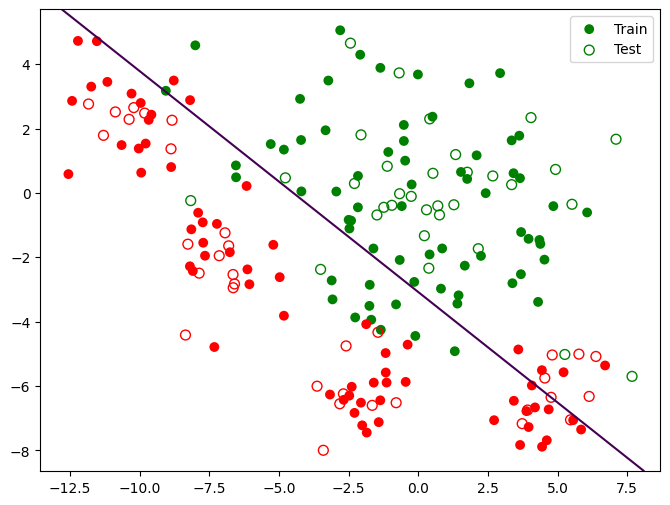

In [ ]:
# on créé une nouvelle figure sur laquelle on affiche les points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0], X_train[:,1], c=cmp[y_train], s=50, edgecolors='none', label="Train")
plt.scatter(X_test[:,0],  X_test[:,1], c='none', s=50, edgecolors=cmp[y_test], label="Test")

# on calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
nx, ny = 400, 400
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# meshgrid permet d'échantillonner tous les points du plan (entre x_min et x_max)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
# .predict_proba permet de prédire le score de la LDA pour un ensemble d'observations
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
for cls_idx in range(max(labels)):
    zz = Z[:, cls_idx].reshape(xx.shape)
    # on dessine la frontière correspond à un score de 0,5
    # les scores < 0,5 correspondent à la classe 0
    # les scores > 0,5 correspondent à la classe 1
    plt.contour(xx, yy, zz, [0.5])
plt.legend()
plt.show()

## Modèle non-linéaire: perceptron multicouche

Comme vous avez pu le constater, la frontière de séparation idéale entre les deux groupes n’est pas linéaire. Il nous faut donc changer de méthode. Je vous propose d'utiliser un réseau de neurones simple, un perceptron multicouche pour réaliser la discrimination entre les deux classes. Nous utiliserons la méthode [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
de scikit-learn


Nous étudierons très en détail ces méthodes plus tard dans le cours mais si vous le souhaitez, vous pouvez trouver dores et déjà [des explications](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification) concernant le fonctionnement général de cet objet).


Il est très
instructif d’examiner [les valeurs par défaut des paramètres](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

Les perceptrons multicouches ont été présentés dans [le dernier chapitre de l’UE RCP208](https://cedric.cnam.fr/vertigo/Cours/ml/coursReseauxNeuronesMulticouches.html)
portant sur les réseaux de neurones. Il n’est pas indispensable de connaître le fonctionnement précis des réseaux de neurones pour ce TP, ces modèles seront revus par la suite dans la partie du cours portant
sur l’apprentissage profond.

Les trois paramètres importants que nous allons manipuler sont le coefficient d’oubli, le nombre de neurones par couche et le nombre de couches. Par défaut, scikit-learn instancie un réseau de neurones à une
seule couche cachée contenant 100 neurones.

Nous utilisons d’abord un coefficient « d’oubli » (*weight decay*) `alpha = 1e-5`. Ce terme correspond à l’intensité de la régularisation L2 appliquée sur le perceptron. Pour rappel, l’objectif de la
régularisation est de réduire la capacité du modèle.

In [ ]:
from sklearn.neural_network import MLPClassifier
# nous utilisons ici l'algorithme L-BFGS pour optimiser le perceptron
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, random_state=42)

# évaluation et affichage sur split1
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print(f"Le score en train est {train_score:.3f}")

test_score = clf.score(X_test, y_test)
print(f"Le score en test est {test_score:.3f}")

Le score en train est 0.993
Le score en test est 0.939


### <font color='violet'>Question</font>
À l’aide de la documentation de scikit-learn, déterminez à quoi correspond la valeur renvoyée par la méthode .score().


### <font color='violet'>Correction</font>
.score() calcule la métrique habituelle de classification: l”accuracy (en français, le taux de bonnes prédictions), c’est-à-dire le pourcentage d’exemples qui ont été correctement prédits par le modèle.

Comme précédemment pour l’analyse factorielle discriminante, nous pouvons désormais tracer la frontière de décision du perceptron multicouche que nous venons d’optimiser.

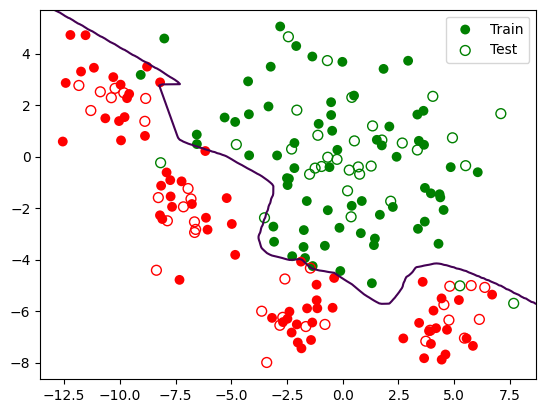

In [ ]:
# créer une nouvelle figure
plt.figure()
# afficher les nuages de points apprentissage (remplis) et de test (vides)
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train],s=50, edgecolors='none', label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c='none', s=50, edgecolors=cmp[y_test], label="Test")

# calculer la probabilité de sortie du perceptron pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
for cls_idx in range(max(labels)):
    zz = Z[:, cls_idx].reshape(xx.shape)
    # on dessine la frontière correspond à un score de 0,5
    # les scores < 0,5 correspondent à la classe 0
    # les scores > 0,5 correspondent à la classe 1
    plt.contour(xx, yy, zz, [0.5])
plt.legend()
plt.show()

## La base Iris
Les Iris de Fisher est un jeu de données célèbre en classification automatique. Il comporte 150 échantillons répartis en trois classes de
fleurs (Iris Setosa, Iris Versicolor et Iris Virginica). Pour chaque plante, quatre caractéristiques végétales ont été mesurées : longueur de
sépale, largeur de sépale, longueur de pétale, largeur de pétale. Dans ce TP nous n’utilisons que la longueur et la largeur de sépale. Plus
d’informations sur Iris [ici](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

En utilisant les methodes de classification vues précédemment (AFD et MLP), classifier les données `iris`

## La base Wine (facultatif)
Le jeu de données *Wine Dataset* est une collection de 178 vins italiens répartis en 3 catégories, chacune correspondant à un vignoble différent.
Treize mesures physico-chimiques sont disponibles mais dans ce TP nous n’utilisons que les deux premières (taux d’alcool et la couleur du vin).
Plus de détails [ici](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset).

En utilisant les methodes de classification vues précédemment (AFD et MLP), classifier les données `wine`